## Social network product purchase

**The objective of this analysis is to predict whether a person will buy a product displayed on a social network ad or not, given their age, gender and salary and to compare the accuracy of different classification algorithms.**

*Importing Modules*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

sns.set()

%matplotlib inline

**Loading and getting to know the dataset**

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


**The set has:**

   - Id column
   - Gender: Categorical column (Male/Female)
   - Numerical features: Age and Estimated Salary

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


- There are 400 people analyzed.
- The age goes from 18 to 60 years.
- The salary goes from 15000 USD to 150000 USD per year.

**Are there any missing values?**

In [4]:
print(pd.isnull(dataset).sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


*There are no missing values*

**Let's see how gender, salary and age are distributed**

*Gender*

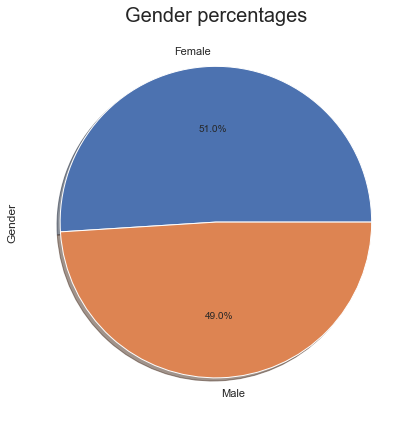

In [5]:
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

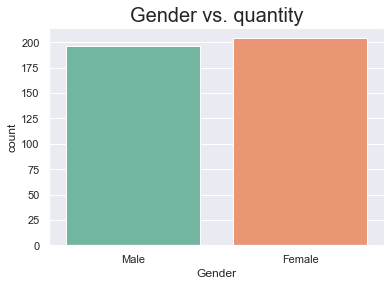

In [6]:
sns.countplot(dataset['Gender'], palette = 'Set2')
plt.title ('Gender vs. quantity', fontsize = 20)
plt.show()

*Age*

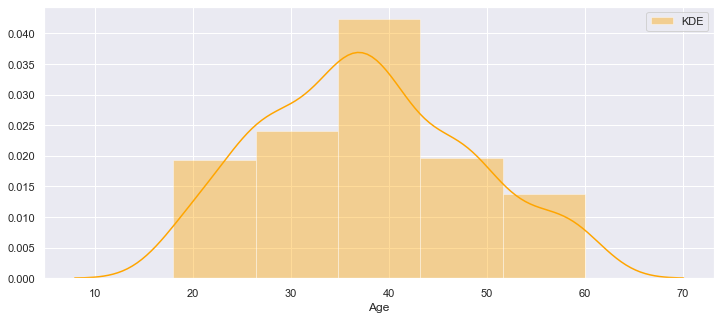

In [7]:
sns.distplot(dataset['Age'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

**Conclusion:**
- Age is normally distributed around 37 years, and most of the people studied are from 35 to 45 years.

**Let's see how age is distributed per gender**

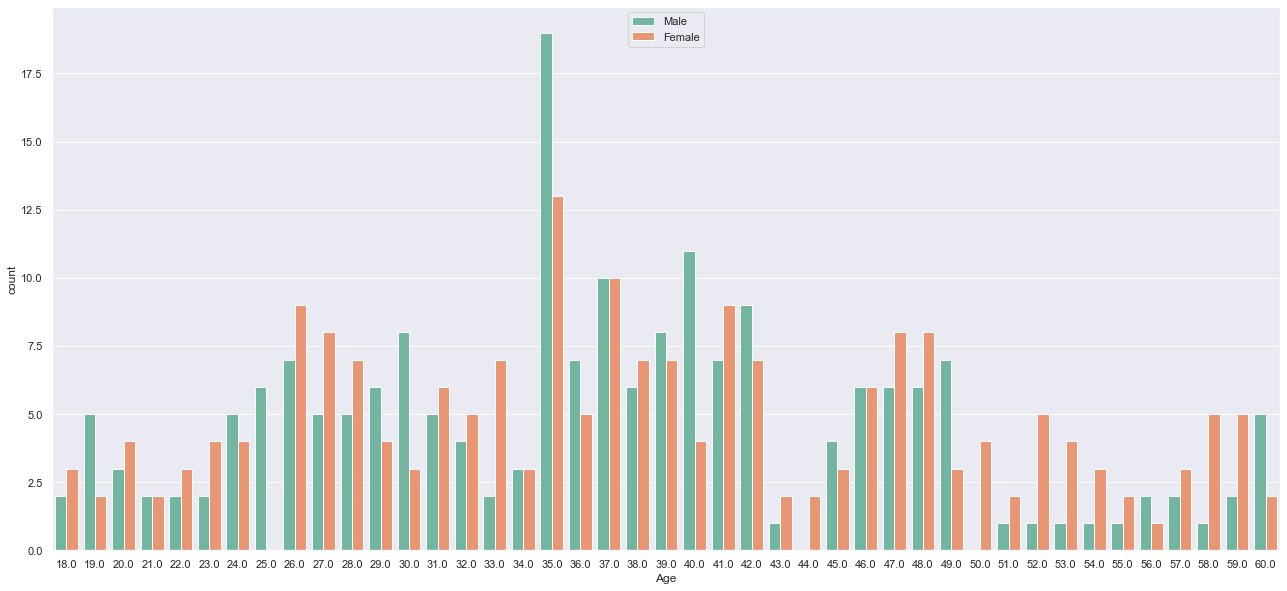

In [8]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'Age',data = dataset , hue='Gender', palette = 'Set2')
plt.legend(loc='upper center')
plt.show()

There seems to be equal analyzed people per gender per age, seeing only more men of 35 years.

In [9]:
tag1 = 'Male'
tag2 = 'Female'
Male = dataset[dataset["Gender"] == tag1][['Age','EstimatedSalary']]
Female = dataset[dataset["Gender"] == tag2][['Age','EstimatedSalary']]

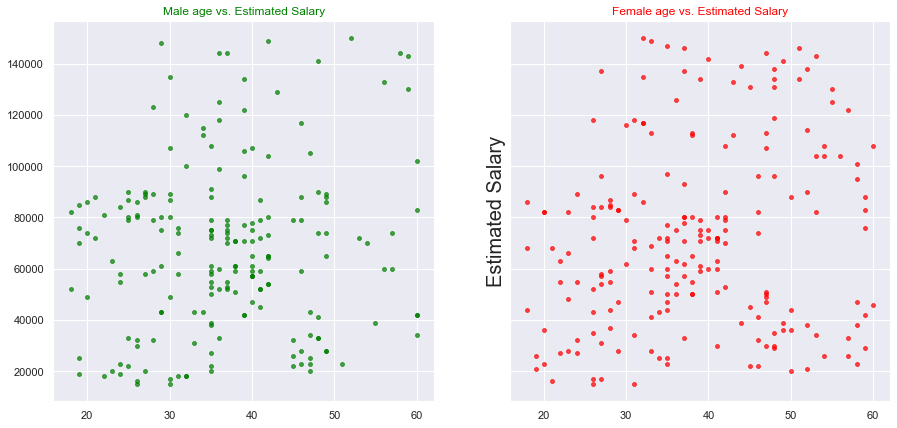

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(Male.Age, Male.EstimatedSalary, c = 'green', s = 15, alpha = 0.7)
ax1.set_title('Male age vs. Estimated Salary', c = 'green')
ax2.scatter(Female.Age, Female.EstimatedSalary, c='red', s = 15, alpha = 0.7)
ax2.set_title('Female age vs. Estimated Salary', c ='red')
plt.gcf().set_size_inches(15, 7)

plt.ylabel('Estimated Salary', fontsize = 20)

plt.show()

**Conclusion:** There is no correlation between the estimated salary of a male or female with their age.

**Statistics for purchased column**

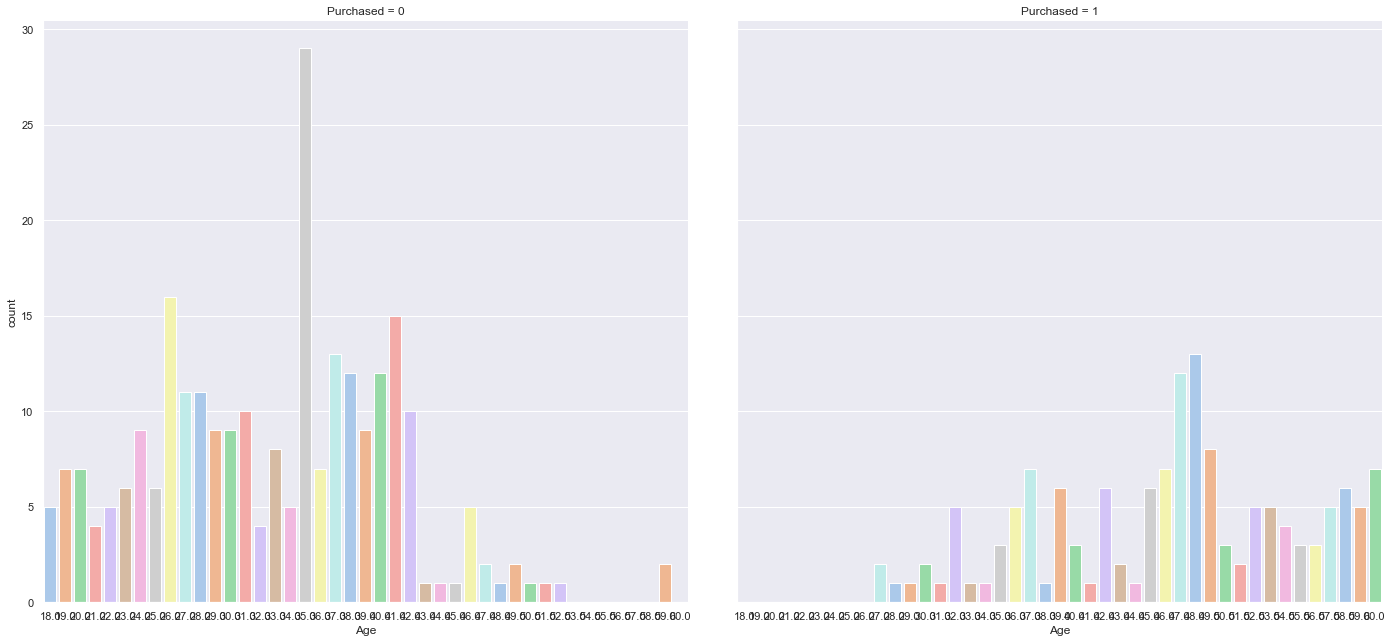

In [11]:
sns.catplot(x="Age", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.gcf().set_size_inches(20, 10)
plt.show()

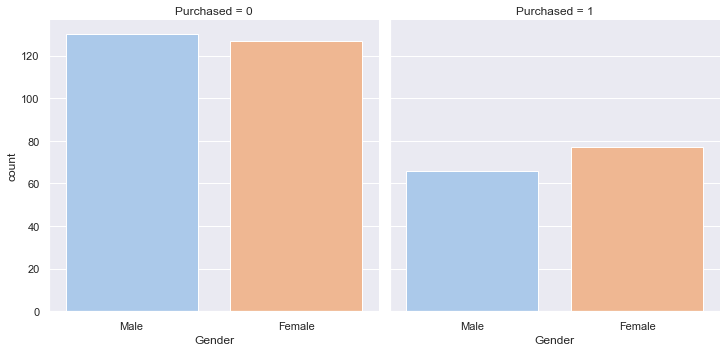

In [12]:
sns.catplot(x="Gender", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.show()

**Conclusions:**
- The product seem to be intended for people within the range of 50 - 60 years, and it also seems to be intended both for male and Female gender.
- As we saw on the Age vs Salary plots, it seems that the women analyzed have higher income than men, so this might be a reason for the slight difference between gender in purchased or not terms.

**Feature Engineering**

First let´s drop the ID column as it doesn't give any information.

In [13]:
dataset2 = dataset.copy()
dataset2 = dataset2.drop(['User ID'], axis = 1)

Splitting features

In [14]:
X = dataset2.iloc[:, 0:3]
y = dataset2.iloc[:, -1]

In [15]:
X = pd.get_dummies(X)
X = X[['Gender_Male','Gender_Female','Age','EstimatedSalary']]
X = X.drop(['Gender_Male'], axis = 1)

Splitting train - test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scaling data

In [17]:
#s c_X = MinMaxScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

**Logistic regression modeling**

In [18]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predictions

In [19]:
y_pred = classifier.predict(X_test)

**Accuracy with confusion matrix**

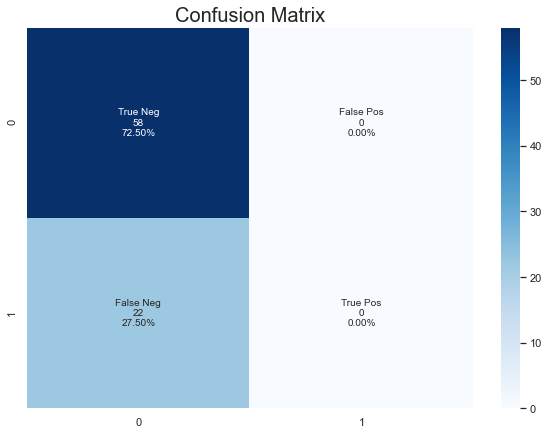

In [20]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues')
plt.gcf().set_size_inches(10, 7)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

**As we didn't scale the data, the results and accuracy are pretty low, let's see what happens with other models**

Accuracy of the regression

In [21]:
accuracy_LR = accuracy_score(y_test,y_pred) *100
print('The accuracy of the logistic regression is: ' +str(accuracy_LR) + ' %.')

The accuracy of the logistic regression is: 72.5 %.


Parameters of the regression

In [22]:
parameters_LR = classifier.coef_
parameters_LR

array([[-1.74060633e-10, -3.52915288e-09, -1.61879619e-06]])

**Comparing classifier algorithms: Random Forest Classifier, K-NN, Naive Bayes, and Ensambled models**

In [23]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    return clf, accuracy

In [24]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy"])

models_to_evaluate = [RandomForestClassifier(n_estimators=1000), KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2),
                      SVC(), GaussianNB(), GradientBoostingRegressor(n_estimators=300, learning_rate=0.01), 
                     AdaBoostClassifier(n_estimators=300, learning_rate=0.01), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models_to_evaluate:
    clf, accuracy = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy}, ignore_index=True)

model_performance

,Model,Accuracy
0,"(DecisionTreeClassifier(max_features='auto', r...",0.9250
1,KNeighborsClassifier(),0.8250
2,SVC(),0.8250
3,GaussianNB(),0.9250
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.9375
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.9375
6,"XGBClassifier(learning_rate=0.01, n_estimators...",0.9500


**Conclusion:** 
- Random Forest classifier, K-NN, SVC and Naive Bayes all reach a better accuracy than logistic regression even without scaling the data.
- Scaling the data with MinMaxScaler (commented above) made all the models reach an accuracy of 92.5%
- Ensambled models reached a better accuracy > 93%.